# Testing the algorithm

In [6]:
import os
import sys
import scipy as sp
import scipy.sparse as sparse
from numpy.testing import assert_allclose
import unittest

# sys.path.insert(
#     0,
#     os.path.abspath(
#         os.path.join(
#             os.path.dirname(__file__),
#             '..')))

# from pagerank import pagerank
# from pagerank import pagerank_power


class TestMolerPageRank(unittest.TestCase):
    def setUp(self):
        # ---G1---
        n1 = 5
        edges1 = sp.array([[0, 1],
                           [1, 2],
                           [2, 1],
                           [2, 3],
                           [2, 4],
                           [3, 0],
                           [3, 2],
                           [4, 0],
                           [4, 2],
                           [4, 3]])
        weights1 = [0.4923,
                    0.0999,
                    0.2132,
                    0.0178,
                    0.5694,
                    0.0406,
                    0.2047,
                    0.8610,
                    0.3849,
                    0.4829]

        self.p1 = 0.83
        self.personalize1 = sp.array([0.6005, 0.1221, 0.2542, 0.4778, 0.4275])
        self.G1 = sparse.csr_matrix(
            (weights1, (edges1[:, 0], edges1[:, 1])), shape=(n1, n1))
        self.pr1 = sp.array([0.1592, 0.2114, 0.3085, 0.1, 0.2208])

        # ---G2---
        n2 = 10
        edges2 = sp.array([[2, 4],
                           [2, 5],
                           [4, 5],
                           [5, 3],
                           [5, 4],
                           [5, 9],
                           [6, 1],
                           [6, 2],
                           [9, 2],
                           [9, 4]])
        weights2 = [0.4565,
                    0.2861,
                    0.5730,
                    0.0025,
                    0.4829,
                    0.3866,
                    0.3041,
                    0.3407,
                    0.2653,
                    0.8079]
        self.G2 = sparse.csr_matrix(
            (weights2, (edges2[:, 0], edges2[:, 1])), shape=(n2, n2))
        self.personalize2 = sp.array([0.8887, 0.6491, 0.7843, 0.7103, 0.7428,
                                      0.6632, 0.7351, 0.3006, 0.8722, 0.1652])
        self.p2 = 0.92
        self.pr2 = sp.array([0.0234, 0.0255, 0.0629, 0.0196, 0.3303,
                             0.3436, 0.0194, 0.0079, 0.023, 0.1445])

        # ---G3---
        n3 = 5
        edges3 = sp.array([[2, 4]])
        weights3 = [0.5441]
        self.G3 = sparse.csr_matrix(
            (weights3, (edges3[:, 0], edges3[:, 1])), shape=(n3, n3))

        self.personalize3 = sp.array([0.0884, 0.2797, 0.3093, 0.5533, 0.985])
        self.p3 = 0.81
        self.pr3 = sp.array([0.0358, 0.1134, 0.1254, 0.2244, 0.501])

        # ---G4---
        n4 = 5
        edges4_rows = []
        edges4_cols = []
        weights4 = []
        self.G4 = sparse.csr_matrix(
            (weights4, (edges4_rows, edges4_cols)), shape=(n4, n4))

        self.personalize4 = sp.array([0.2534, 0.8945, 0.9562, 0.056, 0.9439])
        self.p4 = 0.70
        self.pr4 = sp.array([0.0816, 0.2882, 0.3081, 0.018, 0.3041])

        # ---G5---
        n5 = 0
        edges5_rows = []
        edges5_cols = []
        weights5 = []
        self.G5 = sparse.csr_matrix(
            (weights5, (edges5_rows, edges5_cols)), shape=(n5, n5))

        self.personalize5 = sp.array([])
        self.p5 = 0.70
        self.pr5 = sp.array([])

    def test_pagerank_1(self):
        calculated_pagerank = pagerank(self.G1, p=self.p1,
                                       personalize=self.personalize1)
        assert_allclose(calculated_pagerank, self.pr1, rtol=0, atol=1e-04)

    def test_pagerank_2(self):

        calculated_pagerank = pagerank(self.G2, p=self.p2,
                                       personalize=self.personalize2)
        assert_allclose(calculated_pagerank, self.pr2, rtol=0, atol=1e-04)

    def test_single_edge(self):
        calculated_pagerank = pagerank(self.G3, p=self.p3,
                                       personalize=self.personalize3)
        assert_allclose(calculated_pagerank, self.pr3, rtol=0, atol=1e-04)

    def test_zero_edge(self):
        calculated_pagerank = pagerank(self.G4, p=self.p4,
                                       personalize=self.personalize4)
        assert_allclose(calculated_pagerank, self.pr4, rtol=0, atol=1e-04)

    def test_empty_graph(self):
        calculated_pagerank = pagerank(self.G5, p=self.p5,
                                       personalize=self.personalize5)
        self.assertEqual(calculated_pagerank.size, 0)

    def test_power_pagerank_1(self):
        calculated_pagerank = pagerank_power(self.G1, p=self.p1,
                                             personalize=self.personalize1)
        assert_allclose(calculated_pagerank, self.pr1, rtol=0, atol=1e-04)

    def test_power_pagerank_2(self):

        calculated_pagerank = pagerank_power(self.G2, p=self.p2,
                                             personalize=self.personalize2)
        assert_allclose(calculated_pagerank, self.pr2, rtol=0, atol=1e-04)

    def test_power_single_edge(self):
        calculated_pagerank = pagerank_power(self.G3, p=self.p3,
                                             personalize=self.personalize3)
        assert_allclose(calculated_pagerank, self.pr3, rtol=0, atol=1e-04)

    def test_power_zero_edge(self):
        calculated_pagerank = pagerank_power(self.G4, p=self.p4,
                                             personalize=self.personalize4)
        assert_allclose(calculated_pagerank, self.pr4, rtol=0, atol=1e-04)

    def test_power_empty_graph(self):
        calculated_pagerank = pagerank_power(self.G5, p=self.p5,
                                             personalize=self.personalize5)
        self.assertEqual(calculated_pagerank.size, 0)


#             assert_array_almost_equal(Ynx,  Yml, decimal = 5)
if __name__ == '__main__':
    unittest.main()

E
ERROR: /home/denys/ (unittest.loader._FailedTest)
----------------------------------------------------------------------
AttributeError: module '__main__' has no attribute '/home/denys/'

----------------------------------------------------------------------
Ran 1 test in 0.002s

FAILED (errors=1)


SystemExit: True

/home/denys/ucu/2course_2term/LA/practice/lab1/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [33]:
!python  ../test/fast_pagerank_test.py

/Users/arminsajadi/anaconda3/lib/python3.7/site-packages/numpy/matrixlib/defmatrix.py:71: PendingDeprecationWarning: the matrix subclass is not the recommended way to represent matrices or deal with linear algebra (see https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html). Please adjust your code to use regular ndarray.
  return matrix(data, dtype=dtype, copy=False)
..........
----------------------------------------------------------------------
Ran 10 tests in 0.020s

OK


# Benchmarking

To avoid the clutter, we only visualize the fastest method from each implementation, that is: 

- `networkx.pagerank_scipy`
- Latest implementation of  `iGraph.personalized_pagerank` (PRPACK)
- Our `pagerank_power` 


In [5]:
'''
Calcualate PageRank on several random graphs.
'''
import scipy as sp
import pandas as pd
import timeit
import os
import sys
import random
import igraph
import networkx as nx
sys.path.insert(0, '..')
# from fast_pagerank.pagerank import pagerank
from pagerank import pagerank_power

# def print_and_flush(args):
    
#     sys.stdout.flush()
def get_random_graph(
        min_size=20,
        max_size=2000,
        min_density=0.1,
        max_density=0.5):
    ''' Creates a random graph and a teleport vector and output them
        in different formats for different algorithms

    Inputs
    ------

    min_size and max_size: The size of the graph will be a random number
        in the range of (min_size, max_size)
    min_sparsity and max_sparsity: The sparcity of the graph
        will be a random number in the range of (min_sparsity, max_sparsity)

    Returns
    -------

    nxG: A random Graph for NetworkX
    A: The equivallent csr Adjacency matrix, for our PageRank
    iG: The equivallent iGraph
    personalize_vector: Personalization probabily vector
    personalize_dict: Personalization probabily vector,
                    in the form of a dictionary for NetworkX

    '''
    G_size = random.randint(min_size, max_size)
    p = random.uniform(min_density, max_density)

    A = sp.sparse.random(G_size, G_size, p, format='csr')
    nxG = nx.from_scipy_sparse_matrix(A, create_using=nx.DiGraph())

    iG = igraph.Graph(list(nxG.edges()), directed=True)
    iG.es['weight'] = A.data

    personalize_vector = sp.random.random(G_size)
    personalize_dict = dict(enumerate(personalize_vector.reshape(-1)))
    return A, nxG, iG, personalize_vector, personalize_dict


def get_real_data_graph(
        min_size=20,
        max_size=2000,
        min_density=0.1,
        max_density=0.5):
    G_size = random.randint(min_size, max_size)
    p = random.uniform(min_density, max_density)

#     A = sp.sparse.random(G_size, G_size, p, format='csr')
    edges_ = np.load('edges.npy')
    len_edges = len(edges_)
    weights_ = [1 / len_edges for _ in range(len_edges)]
    A = sparse_matrix(weights_, edges_, matrix_dim)
    nxG = nx.from_scipy_sparse_matrix(A, create_using=nx.DiGraph())

    iG = igraph.Graph(list(nxG.edges()), directed=True)
    iG.es['weight'] = A.data

    personalize_vector = sp.random.random(G_size)
    personalize_dict = dict(enumerate(personalize_vector.reshape(-1)))
    return A, nxG, iG, personalize_vector, personalize_dict


print("started work")
n = 5
number_of_graphs = 5

node_size_vector = sp.zeros(number_of_graphs)
edge_size_vector = sp.zeros(number_of_graphs)
# netx_pagerank_times = sp.zeros(number_of_graphs)
netx_pagerank_times_numpy = sp.zeros(number_of_graphs)
netx_pagerank_times_scipy = sp.zeros(number_of_graphs)
ig_pagerank_times = sp.zeros(number_of_graphs)
pagerank_times = sp.zeros(number_of_graphs)
pagerank_times_power = sp.zeros(number_of_graphs)

damping_factor = 0.85
tol = 1e-3


for i in range(number_of_graphs):
#     A, nxG, iG, personalize_vector, personalize_dict = get_random_graph()
    A, nxG, iG, personalize_vector, personalize_dict = get_real_data_graph()
    node_size_vector[i] = A.shape[0]
    edge_size_vector[i] = A.count_nonzero()
    print ("Graph %d: Nodes: %d, Edges: %d ..." %(i, node_size_vector[i], edge_size_vector[i]))
    sys.stdout.flush()

#     networkx.pagerank commented out, because it is too slow

#     netx_pagerank_times[i] = timeit.timeit(
#         lambda: nx.pagerank(nxG, alpha=damping_factor, tol=tol),
#         number=n) / n

    netx_pagerank_times_numpy[i] = timeit.timeit(
        lambda: nx.pagerank_numpy(nxG, alpha=damping_factor),
        number=n) / n

    netx_pagerank_times_scipy[i] = timeit.timeit(
        lambda: nx.pagerank_scipy(nxG, alpha=damping_factor, tol=tol),
        number=n) / n

    #iGraph, only "prpack", which is their latest version.
    ig_pagerank_times[i] = timeit.timeit(
        lambda: iG.personalized_pagerank(directed=True,
                                         damping=damping_factor,
                                         weights=iG.es['weight'],
                                         implementation="prpack"),
        number=n) / n

#     My implementations

    # pagerank_times[i] = timeit.timeit(
    #     lambda: pagerank(A, p=damping_factor),
    #     number=n) / n
    pagerank_times_power[i] = timeit.timeit(
        # lambda: pagerank_power(A, p=damping_factor, tol=tol),
        # number=n) / n
        lambda: pagerank_power(A),
        number=n) / n


argsort = edge_size_vector.argsort()

edge_size_vector_sorted = edge_size_vector[argsort]
node_size_vector_sorted = node_size_vector[argsort]

# netx_pagerank_times_sorted = netx_pagerank_times[argsort]
netx_pagerank_times_numpy_sorted = netx_pagerank_times_numpy[argsort]
netx_pagerank_times_scipy_sorted = netx_pagerank_times_scipy[argsort]

ig_pagerank_times_sorted = ig_pagerank_times[argsort]

pagerank_times_sorted = pagerank_times[argsort]
pagerank_times_power_sorted = pagerank_times_power[argsort]

comparison_table = pd.DataFrame(list(zip(node_size_vector_sorted,
                                         edge_size_vector_sorted,
#                                          netx_pagerank_times_sorted,
                                         netx_pagerank_times_numpy_sorted,
                                         netx_pagerank_times_scipy_sorted,
                                         ig_pagerank_times_sorted,
                                         pagerank_times_sorted,
                                         pagerank_times_power_sorted)),
                                columns=['Nodes', 'Edges',
#                                          'NetX',
                                         'NetX (numpy)',
                                         'NetX (scipy)',
                                         'iGraph',
                                         '(fast) pagerank',
                                         '(fast) pagerank_power']).\
                    astype({'Nodes': 'int32', 'Edges': 'int32'})
comparison_table.to_csv('pagerank_methods_comparison.csv')
print("Done")

SyntaxError: invalid syntax (<ipython-input-5-71945982d464>, line 102)

# Plotting

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

comparison_table = pd.read_csv('pagerank_methods_comparison.csv', index_col=0)
# display(comparison_table)
comparison_table


,Nodes,Edges,NetX (numpy),NetX (scipy),iGraph,(fast) pagerank,(fast) pagerank_power
0,438,22897,0.457212,0.069692,0.002547,0.0,0.001220
1,882,126738,1.780923,0.322578,0.014177,0.0,0.002431
2,1074,358637,2.584702,0.874294,0.042188,0.0,0.005061
3,1746,598892,7.794452,1.456654,0.090761,0.0,0.009214
4,1561,784212,6.769738,1.942008,0.134081,0.0,0.010644


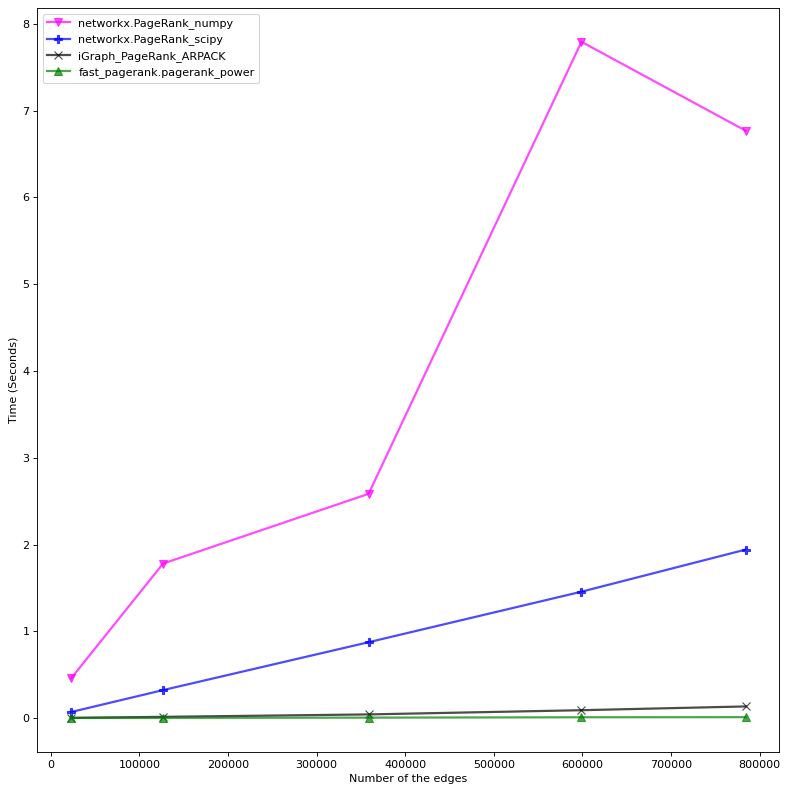

In [4]:
plt.ioff()
fig=plt.figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')


# plt.plot(comparison_table['Edges'], comparison_table['NetX'],
#          'o-', ms=8, lw=2, alpha=0.7, color='cyan',
#          label='networkx.PageRank')
plt.plot(comparison_table['Edges'], comparison_table['NetX (numpy)'],
         'v-', ms=8, lw=2, alpha=0.7, color='magenta',
         label='networkx.PageRank_numpy')

plt.plot(comparison_table['Edges'], comparison_table['NetX (scipy)'],
         'P-', ms=8, lw=2, alpha=0.7, color='blue',
         label='networkx.PageRank_scipy')

plt.plot(comparison_table['Edges'], comparison_table['iGraph'],
         'x-', ms=8, lw=2, alpha=0.7, color='black',
         label='iGraph_PageRank_ARPACK')

# plt.plot(comparison_table['Edges'], comparison_table['(fast) pagerank'],
#          '*-', ms=8, lw=2, alpha=0.7, color='red',
#          label='fast_pagerank.pagerank')
                          
plt.plot(comparison_table['Edges'], comparison_table['(fast) pagerank_power'],
         '^-', ms=8, lw=2, alpha=0.7, color='green',
         label='fast_pagerank.pagerank_power')


plt.xlabel('Number of the edges')
plt.ylabel('Time (Seconds)')


plt.tight_layout()
plt.legend(loc=2)
plt.savefig('pagerank_methods_comparison.png')
plt.show()